# Dự đoán giá cổ phiếu sử dụng Random Forest

In [2]:
# Import thư viện 
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

In [3]:
df = pd.read_csv("C:/Users/DELL/Downloads/data/AAPL.csv")
print("Dữ liệu đầu vào:")
print(df.head())


Dữ liệu đầu vào:
         Date       Open       High        Low      Close  Adj Close  \
0  2020-01-02  74.059998  75.150002  73.797501  75.087502  73.449409   
1  2020-01-03  74.287498  75.144997  74.125000  74.357498  72.735321   
2  2020-01-06  73.447502  74.989998  73.187500  74.949997  73.314888   
3  2020-01-07  74.959999  75.224998  74.370003  74.597504  72.970085   
4  2020-01-08  74.290001  76.110001  74.290001  75.797501  74.143906   

      Volume  
0  135480400  
1  146322800  
2  118387200  
3  108872000  
4  132079200  


In [4]:
print("Thông tin tổng quan về dữ liệu:")
print(df.info())


Thông tin tổng quan về dữ liệu:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 784 entries, 0 to 783
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       784 non-null    object 
 1   Open       784 non-null    float64
 2   High       784 non-null    float64
 3   Low        784 non-null    float64
 4   Close      784 non-null    float64
 5   Adj Close  784 non-null    float64
 6   Volume     784 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 43.0+ KB
None


In [5]:
df['date_ordinal'] = pd.to_datetime(df['Date']).map(datetime.toordinal)
print("Dữ liệu sau khi chuyển đổi cột 'Date':")
print(df[['Date', 'date_ordinal']].head())


Dữ liệu sau khi chuyển đổi cột 'Date':
         Date  date_ordinal
0  2020-01-02        737426
1  2020-01-03        737427
2  2020-01-06        737430
3  2020-01-07        737431
4  2020-01-08        737432


In [6]:
X = df.drop(['Adj Close', 'Date'], axis=1)
y = df['Adj Close']
print("Features và target sau khi tách:")
print(X.head(), y.head())


Features và target sau khi tách:
        Open       High        Low      Close     Volume  date_ordinal
0  74.059998  75.150002  73.797501  75.087502  135480400        737426
1  74.287498  75.144997  74.125000  74.357498  146322800        737427
2  73.447502  74.989998  73.187500  74.949997  118387200        737430
3  74.959999  75.224998  74.370003  74.597504  108872000        737431
4  74.290001  76.110001  74.290001  75.797501  132079200        737432 0    73.449409
1    72.735321
2    73.314888
3    72.970085
4    74.143906
Name: Adj Close, dtype: float64


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Kích thước dữ liệu huấn luyện: {X_train.shape}")
print(f"Kích thước dữ liệu kiểm tra: {X_test.shape}")


Kích thước dữ liệu huấn luyện: (627, 6)
Kích thước dữ liệu kiểm tra: (157, 6)


In [8]:
print("Thống kê cơ bản của dữ liệu huấn luyện:")
print(X_train.describe())


Thống kê cơ bản của dữ liệu huấn luyện:
             Open        High         Low       Close        Volume  \
count  627.000000  627.000000  627.000000  627.000000  6.270000e+02   
mean   130.601316  132.278919  128.963565  130.665299  1.114602e+08   
std     29.820353   30.089993   29.543832   29.836796  5.542593e+07   
min     57.020000   57.125000   53.152500   56.092499  3.519590e+07   
25%    116.319999  117.670002  115.044998  116.340001  7.627980e+07   
50%    136.300003  137.649994  134.339996  135.869995  9.325140e+07   
75%    149.815002  151.570007  148.625000  150.529998  1.275050e+08   
max    181.119995  182.880005  178.529999  182.009995  4.184740e+08   

        date_ordinal  
count     627.000000  
mean   737995.272727  
std       329.933105  
min    737426.000000  
25%    737699.500000  
50%    737994.000000  
75%    738286.500000  
max    738561.000000  


In [9]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'min_samples_leaf': [1, 5, 10]
}

rf = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print(f"Tham số tốt nhất: {best_params}")


Tham số tốt nhất: {'min_samples_leaf': 1, 'n_estimators': 300}


In [10]:
model = RandomForestRegressor(**best_params, random_state=42)
imputer = SimpleImputer(strategy='mean')

X_train_imputed = imputer.fit_transform(X_train)
model.fit(X_train_imputed, y_train)

print("Mô hình đã được huấn luyện xong.")


Mô hình đã được huấn luyện xong.


In [11]:
X_test_imputed = imputer.transform(X_test)
y_pred = model.predict(X_test_imputed)
print("Dự đoán trên tập kiểm tra đã hoàn thành.")


Dự đoán trên tập kiểm tra đã hoàn thành.


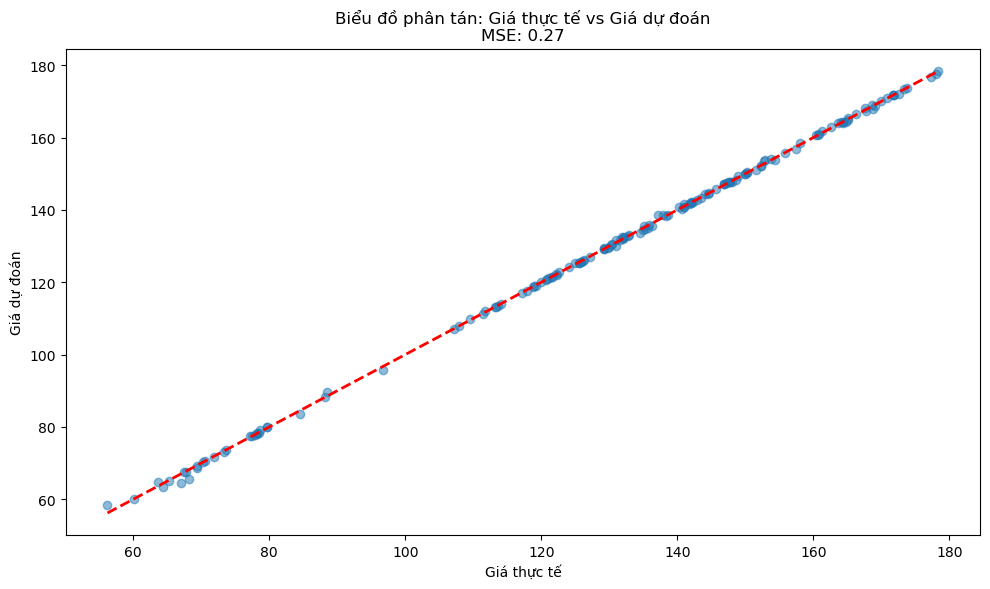

MSE của mô hình : 0.27


In [12]:
mse = mean_squared_error(y_test, y_pred)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Giá thực tế')
plt.ylabel('Giá dự đoán')
plt.title(f'Biểu đồ phân tán: Giá thực tế vs Giá dự đoán\nMSE: {mse:.2f}')
plt.tight_layout()
plt.show()

print(f"MSE của mô hình : {mse:.2f}")


In [13]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Dự đoán với tập kiểm tra
X_test_imputed = imputer.transform(X_test)
y_pred = model.predict(X_test_imputed)

# Tính MAE
mae = mean_absolute_error(y_test, y_pred)
# Tính MSE
mse = mean_squared_error(y_test, y_pred)
# Tính RMSE
rmse = np.sqrt(mse)

# In ra các kết quả đánh giá
print(f"MAE (Mean Absolute Error): {mae:.4f}")
print(f"MSE (Mean Squared Error): {mse:.4f}")
print(f"RMSE (Root Mean Squared Error): {rmse:.4f}")


MAE (Mean Absolute Error): 0.3267
MSE (Mean Squared Error): 0.2657
RMSE (Root Mean Squared Error): 0.5154


In [14]:
from sklearn.model_selection import cross_val_score
import numpy as np

# Áp dụng k-fold cross-validation với k=5
cv_scores = cross_val_score(model, X_train_imputed, y_train, cv=5, scoring='r2')

# In ra các giá trị R² cho từng fold
print("R² cho từng fold:", cv_scores)

# Tính R² trung bình
mean_r2 = np.mean(cv_scores)
print(f"R² trung bình sau cross-validation: {mean_r2:.4f}")


R² cho từng fold: [0.99953734 0.99973284 0.99972065 0.99956966 0.99979989]
R² trung bình sau cross-validation: 0.9997


In [15]:
# Dự đoán trên tập huấn luyện
y_train_pred = model.predict(X_train_imputed)

# Tính R² và MSE trên tập huấn luyện
r2_train = r2_score(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
print(f"R² trên tập huấn luyện: {r2_train:.4f}")
print(f"MSE trên tập huấn luyện: {mse_train:.4f}")

# So sánh với giá trị trên tập kiểm tra
r2_test = r2_score(y_test, y_pred)
mse_test = mean_squared_error(y_test, y_pred)
print(f"R² trên tập kiểm tra: {r2_test:.4f}")
print(f"MSE trên tập kiểm tra: {mse_test:.4f}")


R² trên tập huấn luyện: 1.0000
MSE trên tập huấn luyện: 0.0308
R² trên tập kiểm tra: 0.9997
MSE trên tập kiểm tra: 0.2657


In [41]:
# Lấy ngày cuối cùng trong dữ liệu hiện tại
last_date_before_tuning = pd.to_datetime(df['Date'].max())
next_day_before_tuning = last_date_before_tuning + timedelta(days=1)

# Tạo bản ghi mới cho ngày mai dựa trên bản ghi cuối cùng
next_day_data_before_tuning = df.iloc[-1:].copy()
next_day_data_before_tuning['Date'] = next_day_before_tuning
next_day_data_before_tuning['date_ordinal'] = next_day_before_tuning.toordinal()

# Chuẩn bị dữ liệu cho ngày mai
X_next_before_tuning = next_day_data_before_tuning.drop(['Adj Close', 'Date'], axis=1)

# Dự đoán giá cổ phiếu cho ngày mai trước khi điều chỉnh
next_day_pred_before_tuning = model.predict(imputer.transform(X_next_before_tuning))

print(f"Giá dự đoán cho ngày mai : {next_day_pred_before_tuning[0]:.2f}")


Giá dự đoán cho ngày mai : 150.89


In [17]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Huấn luyện mô hình có điều chỉnh với min_samples_leaf=10
model_tuned = RandomForestRegressor(min_samples_leaf=10, random_state=42)
model_tuned.fit(X_train_imputed, y_train)

# Dự đoán với mô hình có điều chỉnh trên tập kiểm tra
y_pred_tuned = model_tuned.predict(X_test_imputed)

# Tính toán MAE, MSE và RMSE cho mô hình có điều chỉnh
mae_tuned = mean_absolute_error(y_test, y_pred_tuned)
mse_tuned = mean_squared_error(y_test, y_pred_tuned)
rmse_tuned = np.sqrt(mse_tuned)

# In ra kết quả của mô hình có điều chỉnh
print(f"MAE của mô hình có điều chỉnh: {mae_tuned:.4f}")
print(f"MSE của mô hình có điều chỉnh: {mse_tuned:.4f}")
print(f"RMSE của mô hình có điều chỉnh: {rmse_tuned:.4f}")


MAE của mô hình có điều chỉnh: 0.5806
MSE của mô hình có điều chỉnh: 0.9058
RMSE của mô hình có điều chỉnh: 0.9517


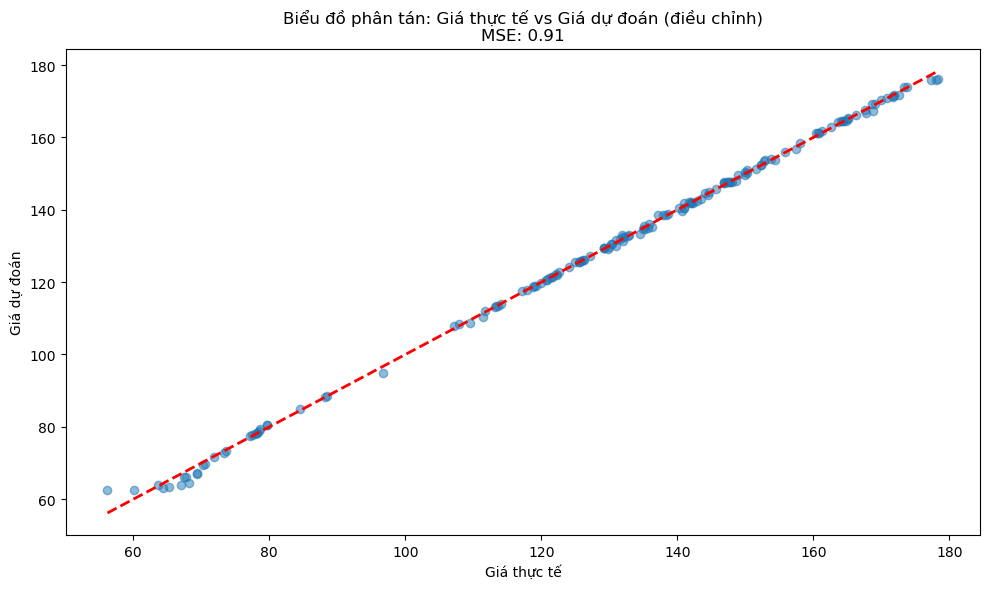

In [18]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_tuned, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Giá thực tế')
plt.ylabel('Giá dự đoán')
plt.title(f'Biểu đồ phân tán: Giá thực tế vs Giá dự đoán (điều chỉnh)\nMSE: {mse_tuned:.2f}')
plt.tight_layout()
plt.show()


In [19]:
last_date = pd.to_datetime(df['Date'].max())
next_day = last_date + timedelta(days=1)

next_day_data = df.iloc[-1:].copy()
next_day_data['Date'] = next_day
next_day_data['date_ordinal'] = next_day.toordinal()

X_next = next_day_data.drop(['Adj Close', 'Date'], axis=1)
next_day_pred = model_tuned.predict(imputer.transform(X_next))

print(f"Giá dự đoán cho ngày mai: {next_day_pred[0]:.2f}")


Giá dự đoán cho ngày mai: 150.59


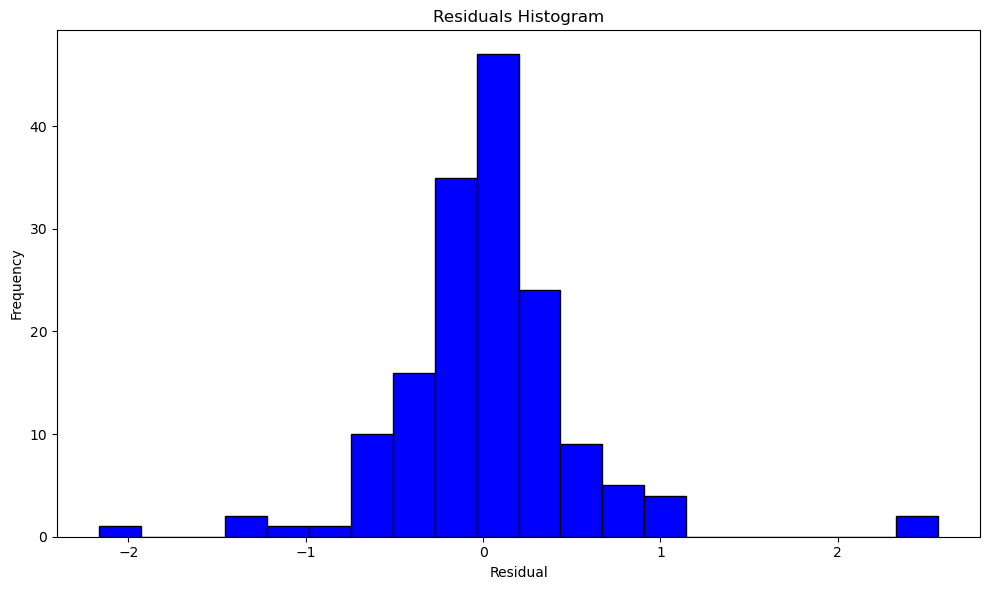

In [20]:
# Dự đoán với tập kiểm tra
X_test_imputed = imputer.transform(X_test)
y_pred = model.predict(X_test_imputed)

# Tính phần dư (residuals)
residuals = y_test - y_pred

# Vẽ biểu đồ phân phối phần dư (Residuals Histogram)
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=20, color='blue', edgecolor='black')
plt.title('Residuals Histogram')
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()
